In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [7]:
# Study data files
mouse_metadata_path = "/Users/berelieta/Documents/HWBootcamp/matplotlib-challenge/Resources/Mouse_metadata.csv"
study_results_path = "/Users/berelieta/Documents/HWBootcamp/matplotlib-challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#pymaceuticals_data = pd.merge(study_results,mouse_metadata,on="Mouse ID")
pymaceuticals_data = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
pymaceuticals_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
len(pymaceuticals_data["Mouse ID"].unique())

249

In [10]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = pymaceuticals_data.loc[pymaceuticals_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_df

array(['g989'], dtype=object)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymace_df = pymaceuticals_data[pymaceuticals_data["Mouse ID"].isin(duplicate_df)==False]
pymace_df.head()    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

data_df = pymace_df.groupby("Drug Regimen")

mean_tumor = pymace_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor = pymace_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_tumor = data_df["Tumor Volume (mm3)"].var()
stddev_tumor = data_df["Tumor Volume (mm3)"].std()
stderr_tumor = data_df["Tumor Volume (mm3)"].sem()

statistics_tb = pd.DataFrame({
    "mean":mean_tumor, 
    "median":median_tumor, 
    "var":variance_tumor,
    "std":stddev_tumor, 
    "sem":stderr_tumor})

statistics_tb

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


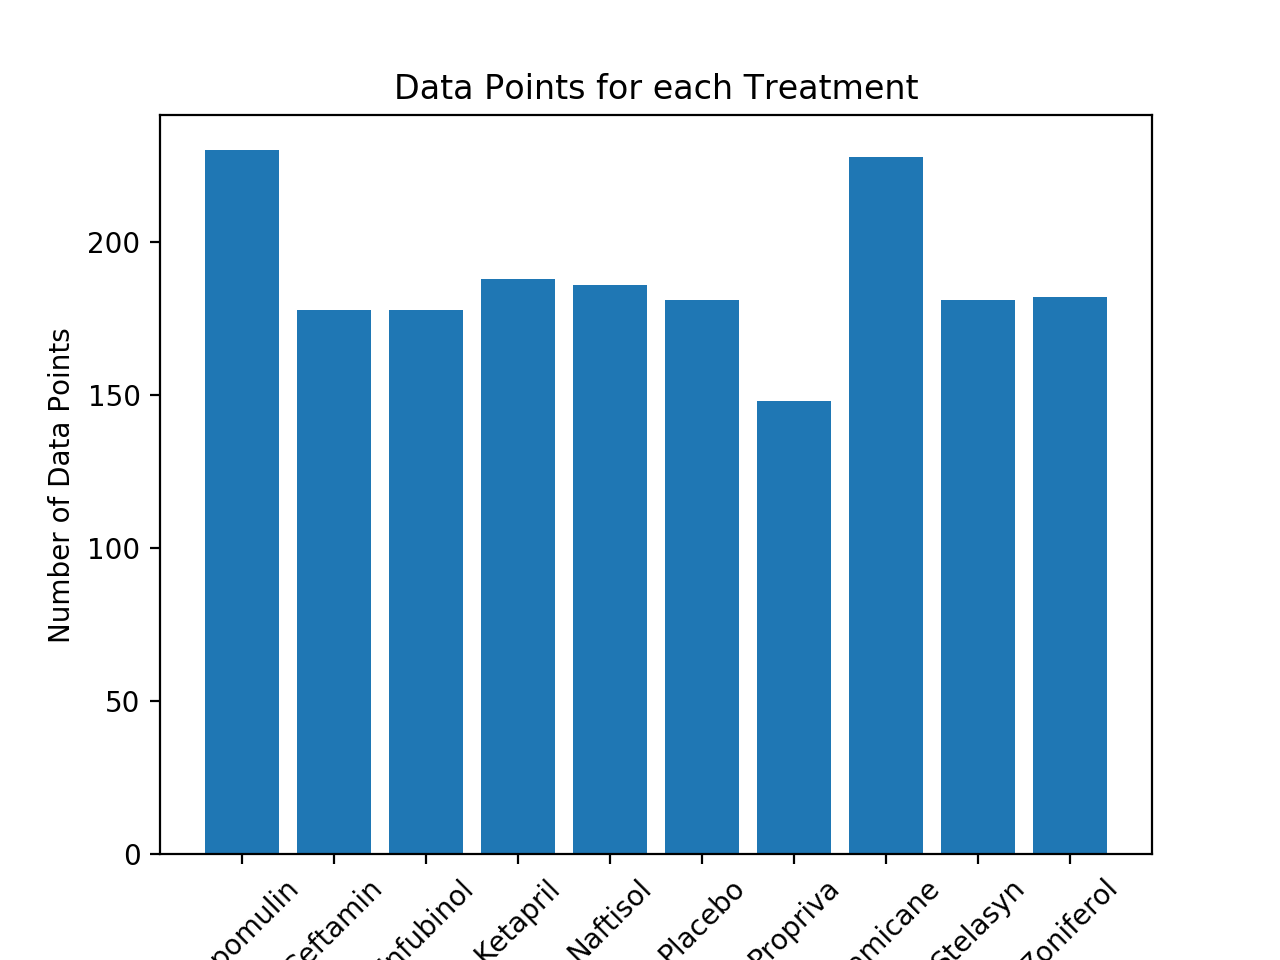

Text(0.5, 1.0, 'Data Points for each Treatment')

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

x_axis = np.arange(len(summary_table))
count_dreg = data_df["Drug Regimen"].count()


plt.bar(x_axis, count_dreg)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points for each Treatment")

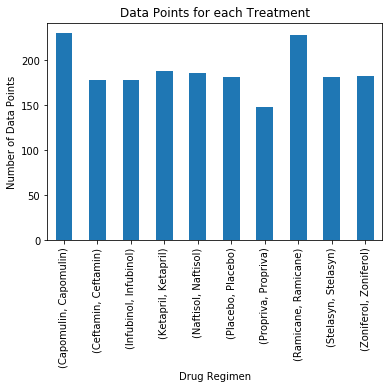

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


a = data_df["Drug Regimen"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points for each Treatment")

plt.show()

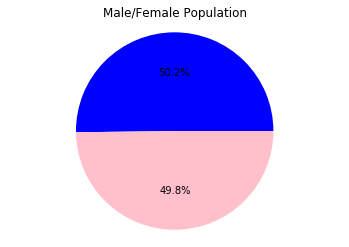

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["blue", "pink"]
gender_percent = mouse_metadata["Sex"].value_counts()

plt.title("Male/Female Population")
plt.pie(gender_percent, colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

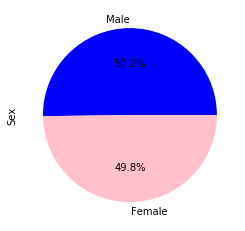

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

b = mouse_metadata["Sex"].value_counts()
colors = ["blue", "pink"]

%matplotlib inline
b.plot(kind='pie', colors= colors, autopct="%1.1f%%")
plt.show()

# Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capo_df = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Capomulin",:]
rami_df = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Ramicane", :]
infu_df = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Infubinol", :]
ceft_df = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Ceftamin", :]
ceft_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [29]:
# Start by getting the last (greatest) timepoint for each mouse

capolast = capo_df.groupby('Mouse ID').max()['Timepoint']
capolastvol = pd.DataFrame(capolast)
capolastmerge = pd.merge(capolastvol, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")
capolastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [39]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


tumors = capolastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers: below {lower_bound} and above {upper_bound}.")

Capomulin potential outliers: below 20.70456164999999 and above 51.83201549.


In [40]:
# Quantitatively determine ramicane outliers

ramilast = rami_df.groupby('Mouse ID').max()['Timepoint']
ramilastvol = pd.DataFrame(ramilast)
ramilastmerge = pd.merge(ramilastvol, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")
ramilastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [41]:
tumorsx = ramilastmerge["Tumor Volume (mm3)"]

quartilesx = tumorsx.quantile([.25,.5,.75])
lowerqx = quartilesx[0.25]
upperqx = quartilesx[0.75]
iqrx = upperqx-lowerqx

lower_boundx = lowerqx - (1.5*iqrx)
upper_boundx = upperqx + (1.5*iqrx)
print(f"Ramicane potential outliers: below {lower_bound} and above {upper_bound}.")

Ramicane potential outliers: below 20.70456164999999 and above 51.83201549.


In [42]:
# Quantitatively determine infubinol outliers

infulast = infu_df.groupby('Mouse ID').max()['Timepoint']
infulastvol = pd.DataFrame(infulast)
infulastmerge = pd.merge(infulastvol, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")
infulastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [43]:
tumorsy = infulastmerge["Tumor Volume (mm3)"]

quartilesy = tumorsy.quantile([.25,.5,.75])
lowerqy = quartilesy[0.25]
upperqy = quartilesy[0.75]
iqry = upperqy-lowerqy

lower_boundy = lowerqy - (1.5*iqry)
upper_boundy = upperqy + (1.5*iqry)
print(f"Infubinol potential outliers: below {lower_bound} and above {upper_bound}.")

Infubinol potential outliers: below 20.70456164999999 and above 51.83201549.


In [44]:
# Quantitatively determine ceftamin outliers


ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [45]:
tumorsz = ceftlastmerge["Tumor Volume (mm3)"]

quartilesz = tumorsz.quantile([.25,.5,.75])
lowerqz = quartilesz[0.25]
upperqz = quartilesz[0.75]
iqrz = upperqz-lowerqz

lower_boundz = lowerqz - (1.5*iqrz)
upper_boundz = upperqz + (1.5*iqrz)
print(f"Ceftamin potential outliers: below {lower_bound} and above {upper_bound}.")

Ceftamin potential outliers: below 20.70456164999999 and above 51.83201549.


In [46]:
tumorsz = ceftlastmerge["Tumor Volume (mm3)"]

quartilesz = tumorsz.quantile([.25,.5,.75])
lowerqz = quartilesz[0.25]
upperqz = quartilesz[0.75]
iqrz = upperqz-lowerqz

lower_boundz = lowerqz - (1.5*iqrz)
upper_boundz = upperqz + (1.5*iqrz)
print(f"Ceftamin potential outliers: below {lower_bound} and above {upper_bound}.")

Ceftamin potential outliers: below 20.70456164999999 and above 51.83201549.


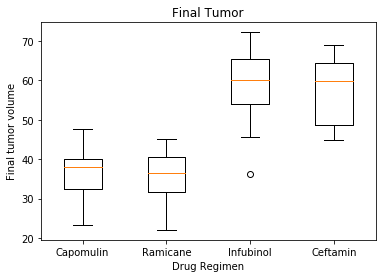

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

list_tumors = [tumors, tumorsx, tumorsy, tumorsz]


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor')
ax1.set_ylabel('Final tumor volume')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(list_tumors, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

# Line and Scatter Plots

In [48]:
cap_df = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Capomulin",:]

capmouse_df = cap_df.loc[pymace_df["Mouse ID"] == "l509",:]
capmouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


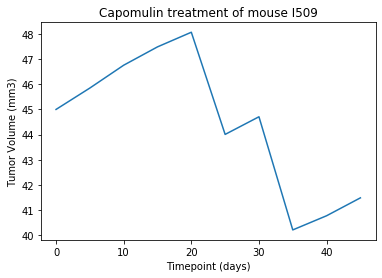

In [49]:
 # Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = capmouse_df["Timepoint"]
y_axis = capmouse_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse I509")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

Text(0.5, 1.0, 'Capomulin Treatment Tumor and Weight Relation')

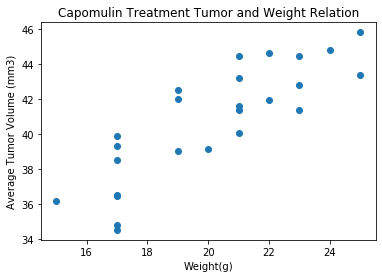

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
 
cap_avg = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Capomulin Treatment Tumor and Weight Relation")

# Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


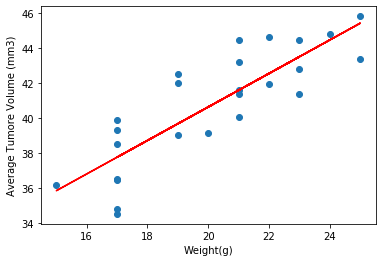

In [52]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
slope = 0.9544396890241045
intercept = 21.552160532685015

y_axis = cap_avg['Weight (g)']*slope+intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_axis,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()